# Numerical Methods for ODEs


Differential equations are among the most important mathematical tools used in producing models in the physical sciences, biological sciences, and engineering. 

An Ordinary Differential Equation (ODE) is an equation that contains a function having one independent variable: $$ \frac {dy}{dx} = f(x, y) $$
The equation is coupled with an initial value/condition $$ y(x_0) = y_0, \ x \geq x_0 , $$ (i.e., value  of y at $x = x_0 $) 

Such equation is called **Initial Value Problem (IVP)**. Our goal is approximate the solution of the problem. Here **f** is sufficiently well-behaved function that maps $ [x_0 , \infty) \times \mathbb{R}^d $ to $ \mathbb{R}^d $ and the initial condition $ y_0 \in \mathbb{R}^d $ is a given vector.( $ \mathbb{R}^d $ denotes the *d*-dimentional real Euclidean space.)

In this project, we consider numerical methods for solving ordinary differential equations.

## Euler's (Forward) Method

The Euler's forward method is formulated as: $$ y_{i+1} = y_i + h \cdot f(x_i, y_i)  ,\qquad   n = 0, 1,...,$$

where $ y_i $ is **a numerical estimate** of the exact solution $ y(x_i) $ and $ h = x_{i+1} - x_i $  ( $ h > 0 $ ) is **the time step**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Forward_Euler(f, y_init, x_range, h):
    '''
    This function performs the Forward Euler's method steps.
    '''
    m = len(y_init) # Number of ODEs
    n = int((x_range[-1] - x_range[0])/h) # Number of sub-intervals
    
    x = x_range[0] # initialize variable x
    y = y_init # initialize variable y
    
    x_soln = np.empty(0) # Creates an empty array for x
    x_soln = np.append(x_soln, x) # Fills in the first element of xsol

    y_soln = np.empty(0) # Creates an empty array for y
    y_soln = np.append(y_soln, y) # Fills in the initial conditions

    for i in range(n):
        yprime = f(x, y) # Evaluates dy/dx
        
        for j in range(m):
            y[j] = y[j] + h*yprime[j] 
            
        x += h # increase x-step
        x_soln = np.append(x_soln, x) 
        
        for r in range(len(y)):
            y_soln = np.append(y_soln, y[r]) 
            
    return [x_soln, y_soln]

In [3]:
def f(x, y):
    '''
    We define our ODEs in this function
    '''
    dy = np.zeros((len(y)))
    dy[0] = 3*(1+x) - y[0]
    return dy


h = 0.2 # step size
x = np.array([1.0, 2.0]) # range of x
y_init = np.array([4.0]) # initial condition

[x_f, y_f] = Forward_Euler(f, y_init, x, h)


In [4]:
# To compare solutions we need to calculate exact solution 

dt = int((x[-1] - x[0]) / h)
t = [x[0]+i*h for i in range(dt+1)]
y_exact = []
for i in range(dt+1):
    y_e = 3*t[i] + np.exp(1-t[i])
    y_exact.append(y_e)


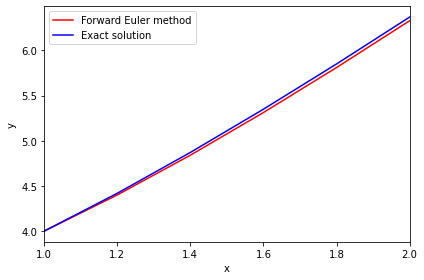

In [5]:
plt.plot(x_f, y_f, 'r')
plt.plot(t, y_exact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["Forward Euler method", 
            "Exact solution"], loc=2)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tight_layout()
plt.show()

-  If we reduce the step size  $ h $  to $ 0.1 $ within the range $ x = 1 $ to $ x = 2 $, we get

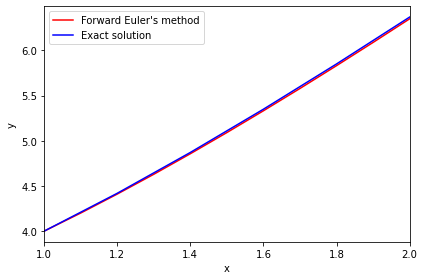

In [6]:
h = 0.1 # step size
x = np.array([1.0, 2.0]) # range of x
y_init = np.array([4.0]) # initial condition

[x_f, y_f] = Forward_Euler(f, y_init, x, h)

plt.plot(x_f, y_f, 'r')
plt.plot(t, y_exact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["Forward Euler's method", 
            "Exact solution"], loc=2)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tight_layout()
plt.show()

## Backward Euler's Method

The Backward Euler's Method is formulated as: $$ y_{i+1} = y_i + h \cdot f(x_{i+1}, y_{i+1})  ,\qquad   n = 0, 1,...,$$

where $ y_i $ is **a numerical estimate** of the exact solution $ y(x_i) $ and $ h = x_{i+1} - x_i $  ( $ h > 0 $ ) is **the time step**.

In [7]:
def Backward_Euler(f, y_init, x_range, h):
    m = len(y_init)
    n = int((x_range[-1] - x_range[0])/h)

    x = x_range[0]
    y = y_init

    x_soln = np.empty(0)
    x_soln = np.append(x_soln, x)

    y_soln = np.empty(0)
    y_soln = np.append(y_soln, y)

    for i in range(n):
        yprime = f(x+h, y)/(1+h)

        for j in range(m):
            y[j] = y[j] + h*yprime[j]

        x += h
        x_soln = np.append(x_soln, x)

        for r in range(len(y)):
            y_soln = np.append(y_soln, y[r])  

    return [x_soln, y_soln]

- When we apply the Backward Euler's Method for the ODE, we get:

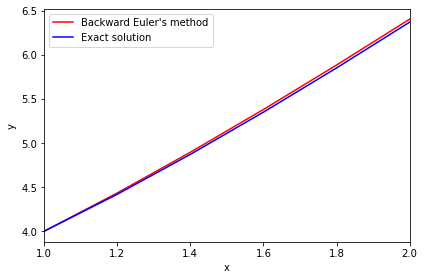

In [8]:
def f(x, y):
    dy = np.zeros((len(y)))
    dy[0] = 3*(1+x) - y[0]
    return dy


h = 0.2 # step size
x = np.array([1.0, 2.0]) # range of x
y_init = np.array([4.0]) # initial condition

[x_b, y_b] = Backward_Euler(f, y_init, x, h)

# Exact solution of the ODE
dt = int((x[-1] - x[0]) / h)
t = [x[0]+i*h for i in range(dt+1)]
y_exact = []
for i in range(dt+1):
    y_e = 3 * t[i] + np.exp(1 - t[i])
    y_exact.append(y_e)
    
plt.plot(x_b, y_b, 'r')
plt.plot(t, y_exact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["Backward Euler's method", 
            "Exact solution"], loc=2)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tight_layout()
plt.show()